# Second Try for neutro VISTA Tc2c 

In [3]:
#Just try fixing it in general ... 

In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib
import anndata

import scanpy as sc
import cell2cell as c2c

import liana as li
import plotnine as p9

from tqdm.auto import tqdm

from tqdm.auto import tqdm
from anndata import read_h5ad
import sys

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/pkgs/miniforge3/envs/CellPhoneDB/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/pkgs/miniforge3/envs/CellPhoneDB/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.


In [7]:
path_chuvio_L1_1 = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/chuvio_L1_1.h5ad"
chuvio_L1_1 = sc.read_h5ad(path_chuvio_L1_1)

path_chuvio_L1_2 = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/chuvio_L1_2.h5ad"
chuvio_L1_2 = sc.read_h5ad(path_chuvio_L1_2)

path_chuvio_L2_1 = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/chuvio_L2_1.h5ad"
chuvio_L2_1 = sc.read_h5ad(path_chuvio_L2_1)

path_chuvio_L3_1 = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/chuvio_L3_1.h5ad"
chuvio_L3_1 = sc.read_h5ad(path_chuvio_L3_1)

path_chuvio_L4_1 = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/chuvio_L4_1.h5ad"
chuvio_L4_1 = sc.read_h5ad(path_chuvio_L4_1)


new_path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/results/celltype_annotation/singler/Level3"

chuvio_L1_1_new = pd.read_csv(f"{new_path}/chuvio_L1_1_labels.csv")
chuvio_L1_2_new = pd.read_csv(f"{new_path}/chuvio_L1_2_labels.csv")
chuvio_L2_1_new = pd.read_csv(f"{new_path}/chuvio_L2_1_labels.csv")
chuvio_L3_1_new = pd.read_csv(f"{new_path}/chuvio_L3_1_labels.csv")
chuvio_L4_1_new = pd.read_csv(f"{new_path}/chuvio_L4_1_labels.csv")

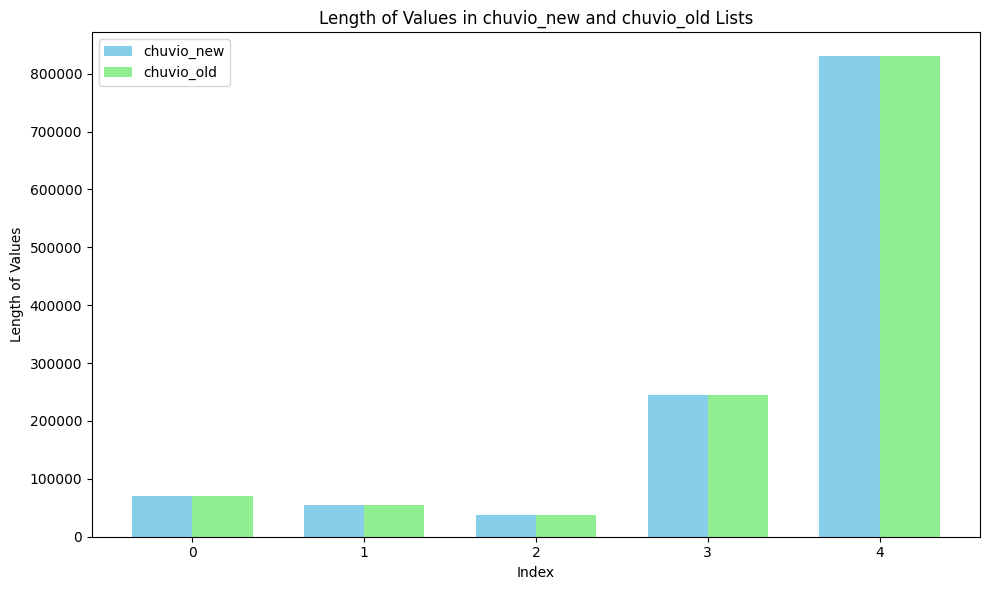

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the lists
chuvio_new = [len(chuvio_L1_1_new), len(chuvio_L1_2_new), len(chuvio_L2_1_new), len(chuvio_L3_1_new), len(chuvio_L4_1_new)]
chuvio_old = [len(chuvio_L1_1), len(chuvio_L1_2), len(chuvio_L2_1), len(chuvio_L3_1), len(chuvio_L4_1)]

# Set the width of the bars
bar_width = 0.35

# Set the positions for the bars
index = np.arange(len(chuvio_new))

# Plot the bars
plt.figure(figsize=(10, 6))
plt.bar(index, chuvio_new, bar_width, color='skyblue', label='chuvio_new')
plt.bar(index + bar_width, chuvio_old, bar_width, color='lightgreen', label='chuvio_old')

plt.xlabel('Index')
plt.ylabel('Length of Values')
plt.title('Length of Values in chuvio_new and chuvio_old Lists')
plt.xticks(index + bar_width / 2, index)  # Adjust xticks to center them between the bars
plt.legend()
plt.tight_layout()
plt.show()


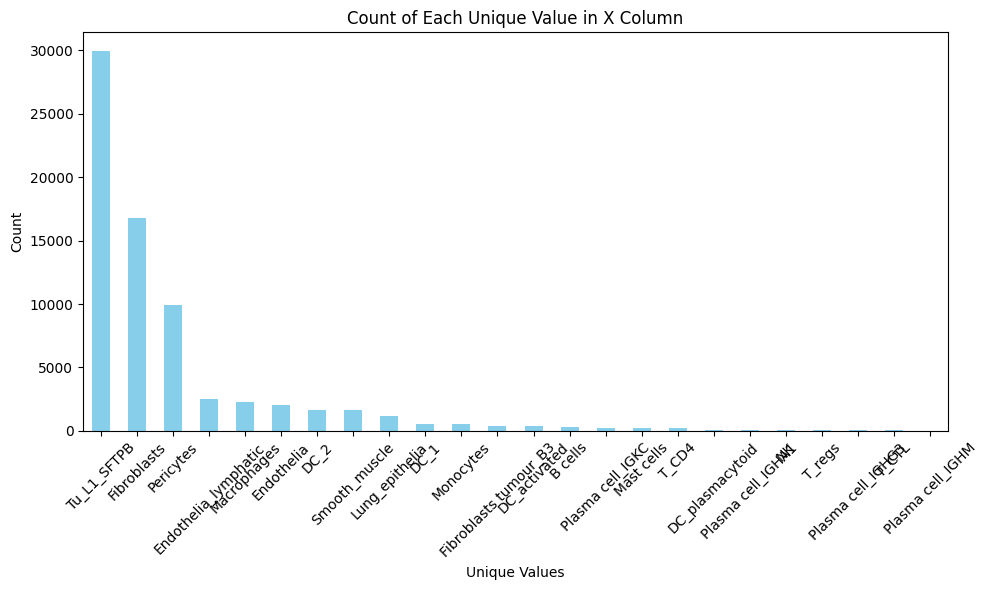

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'chuvio_L1_1_new' is the DataFrame containing your data
# Replace 'x_column_name' with the actual name of the column containing your data
x_column_name = 'singler_annotation'

# Load your DataFrame
# chuvio_L1_1_new = pd.read_csv('your_data.csv')  # if your data is in a CSV file
# Make sure to load your data properly based on its format

# Count the occurrences of each unique value in the 'x' column
value_counts = chuvio_L1_1.obs[x_column_name].value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Unique Value in X Column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


In [6]:
chuvio_L1_1_scores

,Unnamed: 0,B_cell,B_plasma,DC_1,DC_2,DC_activated,DC_pc,Endothelia_vascular,Epi_lung,Fibroblast,...,Neutrophil,NK,Pericyte,T_CD4,T_CD8_exhausted,T_CTL,T_CXCL13,T_reg,TNK_dividing,Tu_L1
0,L1_1_aaaadbga-1,0.196403,0.337274,0.304992,0.396783,0.298560,0.299182,0.360620,0.347885,0.462318,...,0.252120,0.200524,0.344933,0.237599,0.232674,0.245907,0.249020,0.250597,0.193171,0.235866
1,L1_1_aaaajnma-1,0.212045,0.291345,0.238085,0.244346,0.237041,0.292890,0.345661,0.270575,0.372605,...,0.171385,0.144049,0.360202,0.184961,0.172250,0.195343,0.177380,0.178285,0.162532,0.205675
2,L1_1_aaadecno-1,0.184979,0.283955,0.233810,0.251935,0.219198,0.225502,0.369277,0.325709,0.406657,...,0.195367,0.107340,0.439765,0.172632,0.124377,0.161553,0.190815,0.170646,0.112364,0.260917
3,L1_1_aaafkiae-1,0.139803,0.266692,0.245844,0.273169,0.283558,0.193827,0.345438,0.378862,0.441024,...,0.175058,0.195772,0.379964,0.236158,0.252712,0.286275,0.211794,0.229890,0.217828,0.297647
4,L1_1_aaahijio-1,0.177237,0.289537,0.262017,0.263345,0.239237,0.190725,0.372678,0.293477,0.388312,...,0.169213,0.134075,0.390204,0.203384,0.156085,0.170471,0.203578,0.191449,0.150174,0.230509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71182,L1_1_oielkile-1,0.130075,0.245855,0.205518,0.201122,0.202790,0.202872,0.365319,0.277740,0.420561,...,0.133754,0.073604,0.361850,0.143690,0.115693,0.137124,0.146875,0.132253,0.106346,0.209482
71183,L1_1_oieofjmb-1,0.146911,0.226284,0.190613,0.174644,0.190830,0.193288,0.327221,0.330204,0.430323,...,0.136849,0.082093,0.341872,0.136530,0.112591,0.111118,0.132774,0.109260,0.123325,0.276390
71184,L1_1_oieokhmm-1,0.156609,0.260444,0.244562,0.248657,0.219206,0.222814,0.334498,0.381992,0.365429,...,0.163846,0.092447,0.296617,0.139753,0.106435,0.116609,0.145747,0.153702,0.109336,0.341338
71185,L1_1_oifafdfc-1,0.123577,0.247413,0.208384,0.193537,0.163170,0.162087,0.287603,0.426403,0.333137,...,0.141297,0.083716,0.281642,0.113733,0.103390,0.111842,0.096268,0.092661,0.073688,0.408126


In [ ]:
#Find the breast data sets. 
#Find the RCTD anotation.
#Remake the code for the new data sets
#Also a try new remake with the new RCTD labels ? 

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#import the neutro annotations
neutro_annotations_L1_1 = pd.read_csv("/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/results/celltype_annotation/singler_db/L1_1_neutrophils_l3.csv")
neutro_annotations_L1_2 = pd.read_csv("/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/results/celltype_annotation/singler_db/L1_2_neutrophils_l3.csv")
neutro_annotations_L2_1 = pd.read_csv("/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/results/celltype_annotation/singler_db/L2_1_neutrophils_l3.csv")
neutro_annotations_L3_1 = pd.read_csv("/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/results/celltype_annotation/singler_db/L3_1_neutrophils_l3.csv")
neutro_annotations_L4_1 = pd.read_csv("/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/results/celltype_annotation/singler_db/L4_1_neutrophils_l3.csv")

#set the index as the name of the cell 
neutro_annotations_L1_1.set_index(neutro_annotations_L1_1.columns[0], inplace=True)
neutro_annotations_L1_2.set_index(neutro_annotations_L1_2.columns[0], inplace=True)
neutro_annotations_L2_1.set_index(neutro_annotations_L2_1.columns[0], inplace=True)
neutro_annotations_L3_1.set_index(neutro_annotations_L3_1.columns[0], inplace=True)
neutro_annotations_L4_1.set_index(neutro_annotations_L4_1.columns[0], inplace=True)

#modify the neutro annotations index -> exchanged the named of the indices to make up for the wrong axis in those fields. 
neutro_annotations_L1_1.index = "L1_1_" + neutro_annotations_L1_1.index
neutro_annotations_L1_2.index = "L1_2_" + neutro_annotations_L1_2.index
neutro_annotations_L2_1.index = "L3_1_" + neutro_annotations_L2_1.index
neutro_annotations_L3_1.index = "L2_1_" + neutro_annotations_L3_1.index
neutro_annotations_L4_1.index = "L4_1_" + neutro_annotations_L4_1.index

#Reading in the original anndata reads : 
path_chuvio_L1_1 = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/chuvio_L1_1.h5ad"
chuvio_L1_1 = sc.read_h5ad(path_chuvio_L1_1)

path_chuvio_L1_2 = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/chuvio_L1_2.h5ad"
chuvio_L1_2 = sc.read_h5ad(path_chuvio_L1_2)

path_chuvio_L2_1 = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/chuvio_L2_1.h5ad"
chuvio_L2_1 = sc.read_h5ad(path_chuvio_L2_1)

path_chuvio_L3_1 = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/chuvio_L3_1.h5ad"
chuvio_L3_1 = sc.read_h5ad(path_chuvio_L3_1)

path_chuvio_L4_1 = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/chuvio_L4_1.h5ad"
chuvio_L4_1 = sc.read_h5ad(path_chuvio_L4_1)

### add sample code and concatenate the samples

In [8]:
# add the sample code 
chuvio_L1_1.obs["sample"] = "L1_1"
chuvio_L1_2.obs["sample"] = "L1_2"
chuvio_L2_1.obs["sample"] = "L2_1"
chuvio_L3_1.obs["sample"] = "L3_1"
chuvio_L4_1.obs["sample"] = "L4_1"

In [9]:
#set the context column
chuvio_L1_1.obs["L4vsOthers"] = "others"
chuvio_L1_2.obs["L4vsOthers"] = "others"
chuvio_L2_1.obs["L4vsOthers"] = "others"
chuvio_L3_1.obs["L4vsOthers"] = "others"
chuvio_L4_1.obs["L4vsOthers"] = "L4"

In [10]:
#concatenate the samples :
adata = anndata.concat([chuvio_L1_1, chuvio_L1_2, chuvio_L2_1, chuvio_L3_1, chuvio_L4_1], index_unique=None, join='outer')

In [14]:
adata

AnnData object with n_obs × n_vars = 1236776 × 335
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample_id', 'sum', 'detected', 'subsets_Mito_sum', 'subsets_Mito_detected', 'subsets_Mito_percent', 'total', 'libsize_drop', 'sizeFactor', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'singler_annotation', 'ident', 'sample', 'L4vsOthers'
    uns: 'liana_res'
    obsm: 'PCA', 'TSNE', 'UMAP'
    layers: 'logcounts'

### OUT dot plot

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


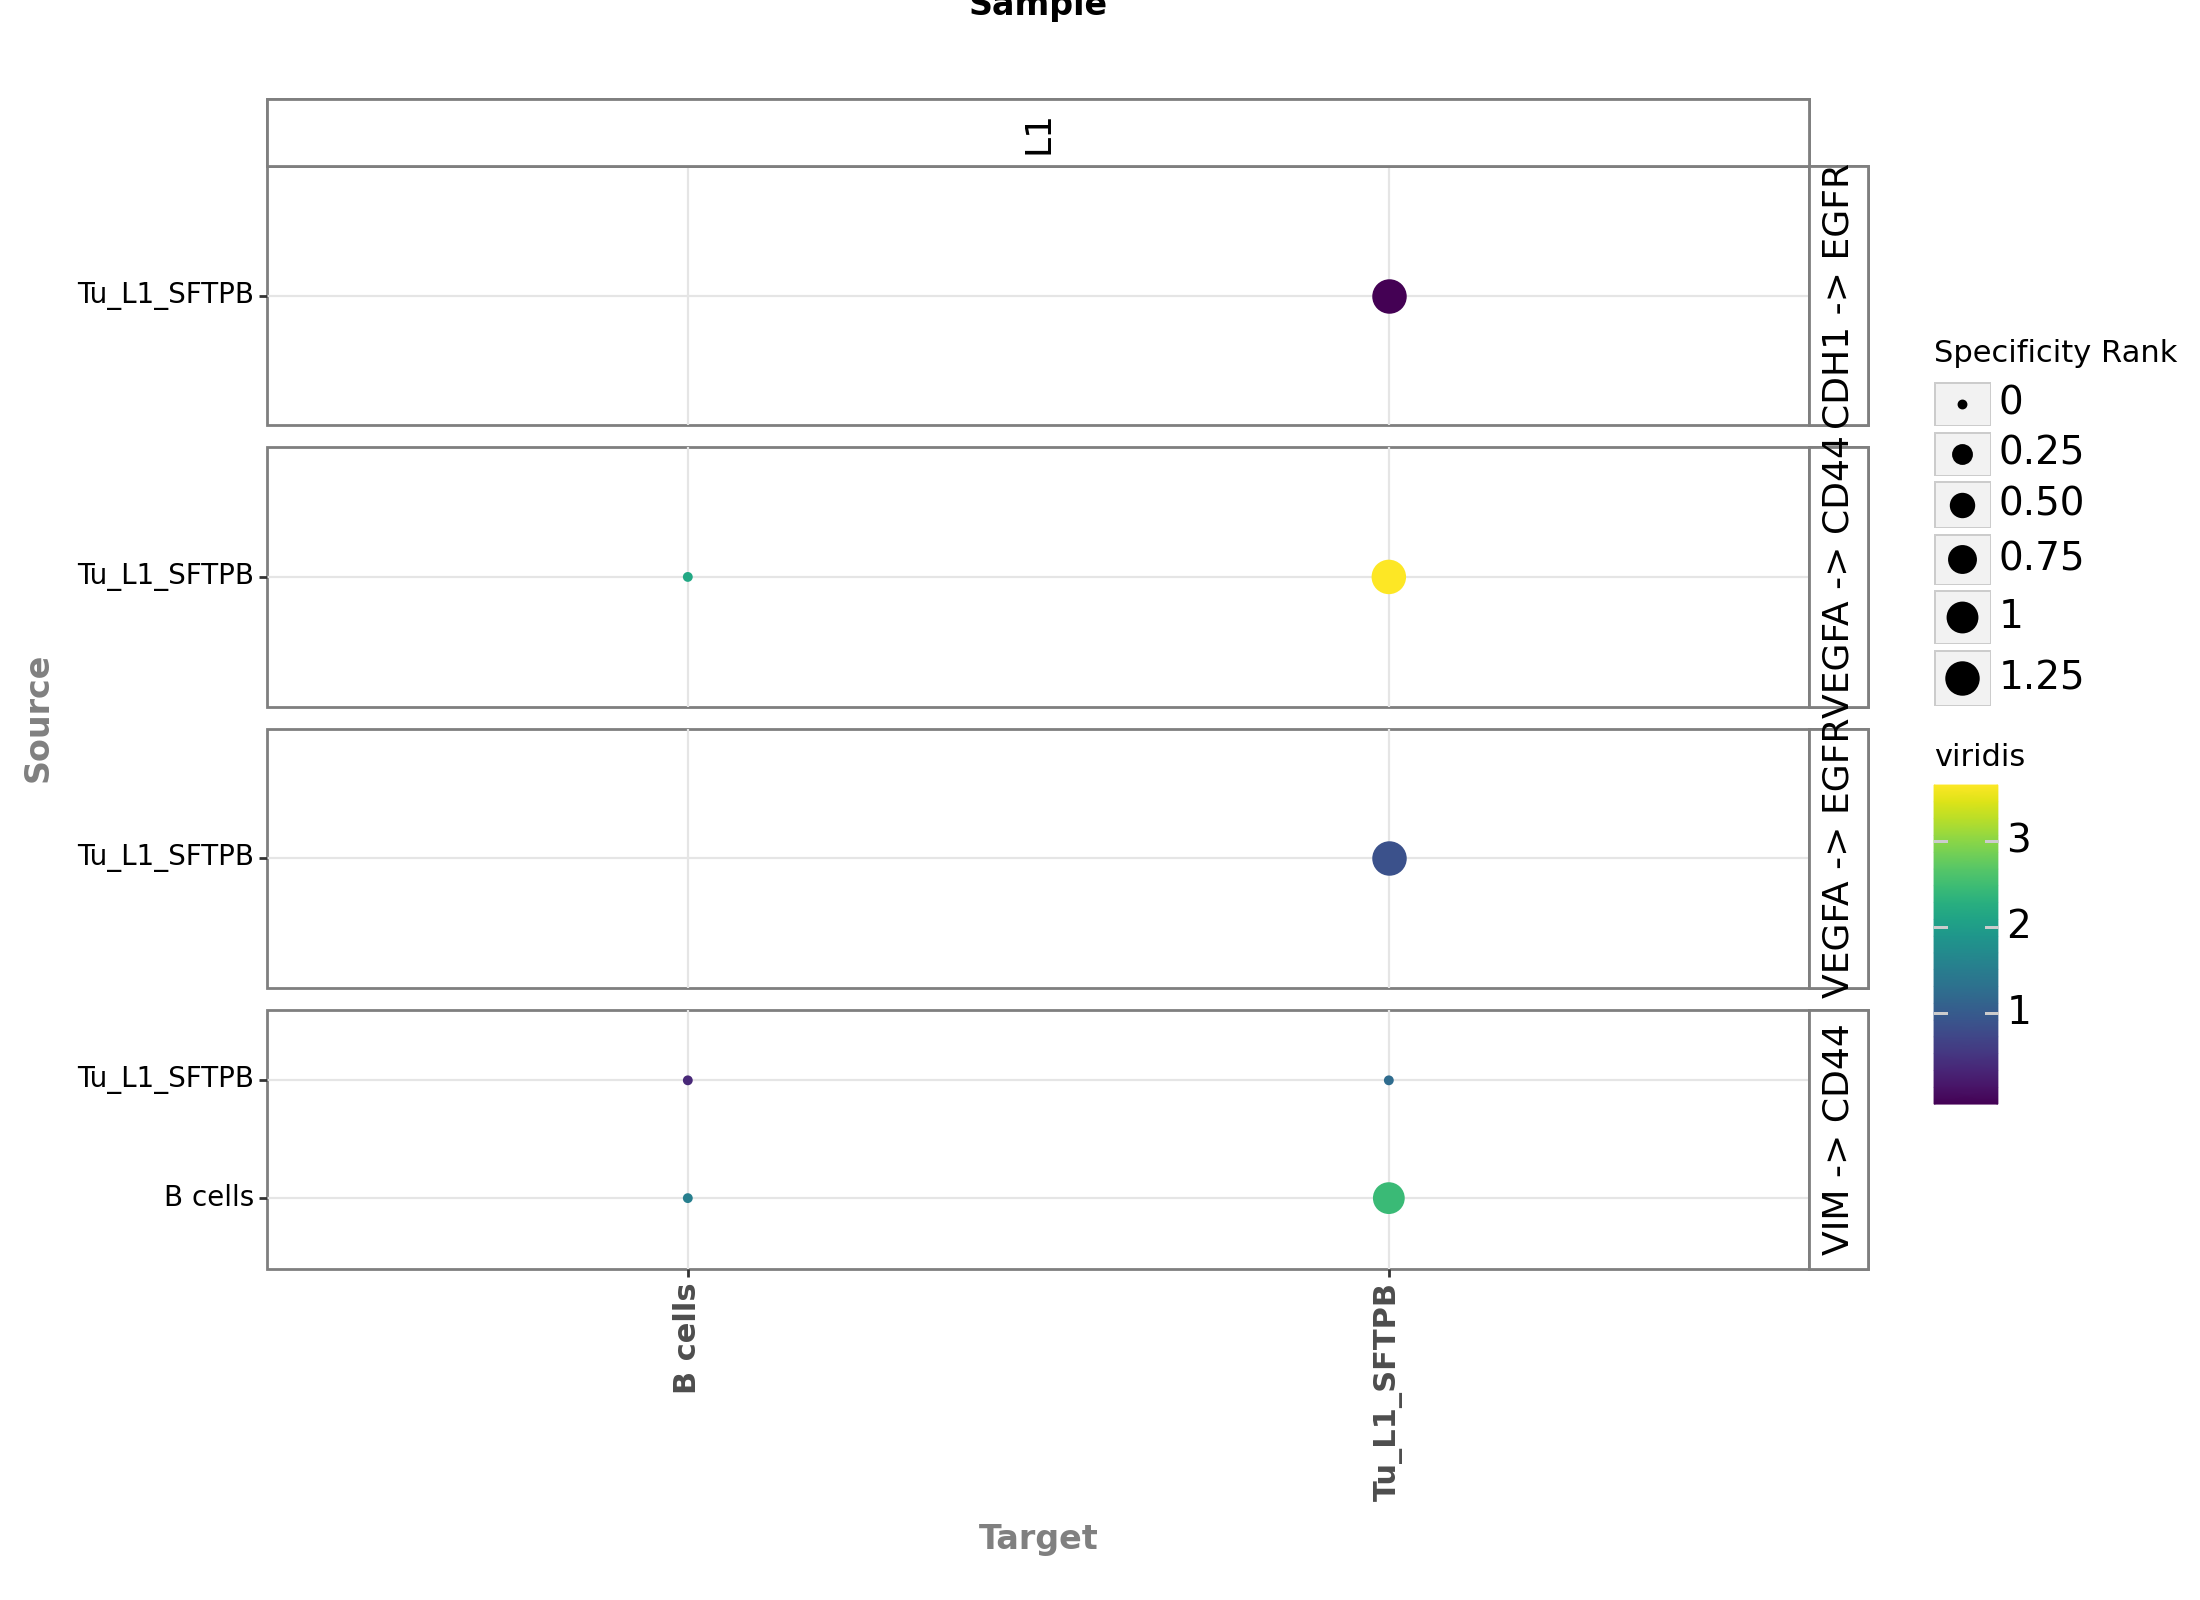

<Figure Size: (1100 x 800)>

In [45]:
plot = (li.pl.dotplot_by_sample(adata=adata,
                               colour='magnitude_rank',
                               size='specificity_rank',
                               source_labels=["Tu_L1_SFTPB", "B cells"],
                               target_labels=["Tu_L1_SFTPB", "B cells"],
                               ligand_complex = ['VIM', 'VEGFA', 'CDH1', 'CXCL12'],
                               receptor_complex= ['CD44', 'IFITM1', 'EGFR', 'CD19'],
                               sample_key='sample',
                               inverse_colour=True,
                               inverse_size=True,
                               figure_size=(11, 8),
                               size_range=(1, 6),
                               ) +
         p9.labs(color='Magnitude rank', size='Specificity Rank'))

plot.save(output_folder + '/Dotplot-by-sample.pdf', height=8, width=11)
plot

## 2.6 RUN Liana by sample 

## 1 Initial Setup

In [12]:
data_folder = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astearAnalysis/TensorC2C/data/liana-outputs/'
output_folder = '/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/TensorC2C/data/tc2c-outputs/'
c2c.io.directories.create_directory(output_folder)

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/TensorC2C/data/tc2c-outputs/ already exists.


In [15]:
li.mt.rank_aggregate.by_sample(adata,
                                   sample_key='sample',
                                   groupby='singler_annotation',
                                   resource_name = 'consensus',
                                   expr_prop=0.1, # must be expressed in expr_prop fraction of cells
                                   min_cells = 5,
                                   n_perms = 100,
                                   use_raw = False, # run on log- and library-normalized counts
                                   verbose = True,
                                   inplace = True
                                  )

Now running: L4_1: 100%|██████████| 5/5 [03:40<00:00, 44.01s/it]


In [16]:
liana_res = adata.uns['liana_res']

## 3.2 Create 4D-Communication Tensor

Specifying the context. In the original they have 12 samples and the first letter tells them if it is Control or sick, so the following ordering operation allows it to setup the order of samples depending on the context. We jsut want to see the dfference between L4 that has two LSE and the others. 

In [36]:
sorted_samples = sorted(adata.obs['sample'].unique())

In [37]:
sorted_samples

['L1_1', 'L1_2', 'L2_1', 'L3_1', 'L4_1']

## 3.3 Generate tensor

To generate the 4D-communication tensor, we will to create matrices with the communication scores for each of the ligand-receptor pairs within the same sample, then generate a 3D tensor for each sample, and finally concatenate them to form the 4D tensor.

Briefly, we use the LIANA dataframe and communication scores to organize them as follows:
-> If you used a pipeline that generated negative scores, replace these with 0,  Otherwise, by default, Tensor-cell2cell will treat these as NaN.
-> ...

In [38]:
adata.X

<1236776x335 sparse matrix of type '<class 'numpy.float64'>'
	with 61561560 stored elements in Compressed Sparse Row format>

In [39]:
#Here we use the magnitude score but we could use the specificity score, in score_key. Also try lowering the outer_fraction value for rare occurences
tensor = li.multi.to_tensor_c2c(liana_res=liana_res, # LIANA's dataframe containing results
                                sample_key='sample', # Column name of the samples
                                source_key='source', # Column name of the sender cells
                                target_key='target', # Column name of the receiver cells
                                ligand_key='ligand_complex', # Column name of the ligands
                                receptor_key='receptor_complex', # Column name of the receptors
                                score_key='magnitude_rank', # Column name of the communication scores to use
                                non_negative = True, # set negative values to 0
                                inverse_fun=lambda x: 1 - x, # Transformation function
                                non_expressed_fill=None, # Value to replace missing values with
                                how='outer', # What to include across all samples
                                lr_fill=np.nan, # What to fill missing LRs with
                                cell_fill = np.nan, # What to fill missing cell types with
                                outer_fraction=1/10., # Fraction of samples as threshold to include cells and LR pairs.
                                lr_sep='^', # How to separate ligand and receptor names to name LR pair
                                context_order=sorted_samples, # Order to store the contexts in the tensor
                                sort_elements=True # Whether sorting alphabetically element names of each tensor dim. Does not apply for context order if context_order is passed.
                               )

100%|██████████| 5/5 [00:01<00:00,  4.21it/s]


In [40]:
from collections import defaultdict

element_dict = defaultdict(lambda: 'Unknown')

In [41]:
#Here the goal is to set the distance code as the context !
context_dict = adata.obs.set_index('sample')['L4vsOthers'].sort_values().to_dict()

In [42]:
context_dict = element_dict.copy()

In [43]:
sorted_samples

['L1_1', 'L1_2', 'L2_1', 'L3_1', 'L4_1']

In [46]:
# THIS IS THE ONLY SPACE WHERE YOU SHOULD BE SETTING YOUR CONTEXT, BY CREATING A SUPER SET OF YOUR SAMPLES !!!!!! 

In [47]:
context_dict.update({'L1_1' : 'others',
                     'L1_2' : 'others',
                     'L2_1' : 'others',
                     'L3_1' : 'others',
                     'L4' : 'L4',
                     })
dimensions_dict = [context_dict, None, None, None]

In [ ]:
#liana_res

## 3.5 Prepare Tensor Metadata -> Selecting the context

In [48]:
adata.obs

,orig.ident,nCount_originalexp,nFeature_originalexp,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,...,libsize_drop,sizeFactor,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters,singler_annotation,ident,sample,L4vsOthers
L1_1_aaaadbga-1,L1,413.0,103,L1_1_aaaadbga-1,1186.546265,1686.810181,413,1,0,0,...,False,2.515645,143.0,52,9,9,Fibroblasts,9,L1_1,others
L1_1_aaaajnma-1,L1,253.0,86,L1_1_aaaajnma-1,1194.922241,1699.988892,253,1,0,0,...,False,1.541061,159.0,78,9,9,Fibroblasts,9,L1_1,others
L1_1_aaadecno-1,L1,176.0,66,L1_1_aaadecno-1,1196.921997,1708.868652,176,0,0,0,...,False,1.072042,157.0,66,9,9,Pericytes,9,L1_1,others
L1_1_aaafkiae-1,L1,293.0,111,L1_1_aaafkiae-1,1204.801636,1698.712280,293,1,0,0,...,False,1.784707,155.0,88,6,6,Fibroblasts,6,L1_1,others
L1_1_aaahijio-1,L1,175.0,73,L1_1_aaahijio-1,1209.148804,1690.650635,175,0,0,1,...,False,1.065951,154.0,72,8,8,Pericytes,8,L1_1,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L4_1_oilnnjie-1,L4,162.0,77,L4_1_oilnnjie-1,7791.851562,5969.610352,165,1,0,0,...,False,1.107579,123.0,77,16,16,Granulocytes,16,L4_1,L4
L4_1_oilnoiin-1,L4,157.0,70,L4_1_oilnoiin-1,7790.732422,5962.326172,157,0,0,1,...,False,1.073395,123.0,70,15,15,DC_1,15,L4_1,L4
L4_1_oiloajgk-1,L4,198.0,78,L4_1_oiloajgk-1,7784.906250,5955.801270,198,1,0,0,...,False,1.353708,128.0,73,3,3,Granulocytes,3,L4_1,L4
L4_1_oilocpdb-1,L4,57.0,39,L4_1_oilocpdb-1,7779.752930,5969.401855,57,0,0,0,...,False,0.389704,101.0,39,2,2,DC_1,2,L4_1,L4


In [49]:
meta_tensor = c2c.tensor.generate_tensor_metadata(interaction_tensor=tensor,
                                              metadata_dicts=[context_dict, None, None, None],
                                              fill_with_order_elements=True
                                             )

In [50]:
pd.__version__

'2.2.0'

In [60]:
data = dict(list(liana_res.groupby('sample')))

In [64]:
data['L4_1']

,sample,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,lr_probs,cellchat_pvals,specificity_rank,magnitude_rank
73639,L4_1,Smooth_muscle,Macrophages,COL1A1,CD44,4.906976,0.03,20.441854,0.306174,-inf,0.005004,0.906326,0.000145,0.00,NaN,1.962964e-09
73640,L4_1,Plasma cell_IGHG1,Macrophages,COL1A1,CD44,4.469788,0.04,17.818729,0.238780,NaN,0.004362,0.900331,0.000138,0.00,NaN,8.538117e-08
73641,L4_1,DC_activated,Macrophages,VIM,CD44,4.425597,0.04,17.553583,0.334427,NaN,0.003852,0.899656,0.000165,0.01,NaN,1.440176e-07
73642,L4_1,Smooth_muscle,Plasma cell_IGHG3,COL1A1,CD44,5.114656,0.00,23.272104,0.362533,-inf,0.005697,0.911687,0.000084,0.00,NaN,1.663154e-07
73643,L4_1,DC_activated,DC_activated,VIM,CD44,4.419315,0.00,17.480070,0.332602,NaN,0.003836,0.899467,0.000124,0.00,NaN,1.813980e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85646,L4_1,Proliferating_TNK,Proliferating_TNK,LGALS3,MCAM,0.605868,0.00,0.277903,0.130677,-38.616226,0.003489,0.530099,0.000000,1.00,NaN,1.000000e+00
85647,L4_1,DC_1,Plasma cell_IGHM,CCL2,CCR2,0.291628,0.00,0.082477,0.284603,-10.897043,0.006869,0.380639,0.000000,1.00,NaN,1.000000e+00
85648,L4_1,Proliferating_TNK,Proliferating_TNK,TNFSF13,FAS,0.285961,0.30,0.078529,0.022499,-4.180782,0.002216,0.374874,0.000000,1.00,NaN,1.000000e+00
85649,L4_1,T_CTL,Fibroblasts tumour_B3,IGF1,IGF1R,0.238029,0.94,0.043404,-0.022246,-7.654428,0.001946,0.308356,0.000000,1.00,NaN,1.000000e+00


## 3.6 Exporting tensors

In [52]:
c2c.io.export_variable_with_pickle(tensor, output_folder + 'BALF-Tensor-5chuvio-VISTA_17_04_24.pkl')

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/TensorC2C/data/tc2c-outputs/BALF-Tensor-5chuvio-VISTA_17_04_24.pkl  was correctly saved.


In [53]:
c2c.io.export_variable_with_pickle(meta_tensor, output_folder + 'BALF-Tensor-5chuvio-VISTA-Metadata_17_04_24.pkl')

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/Analysis/TensorC2C/data/tc2c-outputs/BALF-Tensor-5chuvio-VISTA-Metadata_17_04_24.pkl  was correctly saved.


## 4. Running Tensor-cell2cell to perform a tensor factorization

In [ ]:
# done in the cluster

## 5. Downstream Analyses of Factor Loadings

In [2]:
import cell2cell as c2c

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/pkgs/miniforge3/envs/CellPhoneDB/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
